## importing the necessary libraries

In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

In [86]:
#loading the necessary datasets
train = pd.read_csv("train_0OECtn8.csv")
test = pd.read_csv('test_1zqHu22.csv')
sample = pd.read_csv('sample_submission_JPlpRcN.csv')

In [87]:
train

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13
...,...,...,...,...,...,...,...,...,...,...
89192,89193,23996,15,32,25,Male,Other,340,662,3.91
89193,89194,20466,20,47,31,Male,Other,240,892,3.56
89194,89195,13655,16,97,25,Male,Student,270,462,4.23
89195,89196,24840,9,18,35,Male,Working Professional,230,819,3.77


In [88]:
#dropping the row_id columns before training
train = train.drop('row_id',axis=1)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           89197 non-null  int64  
 1   category_id       89197 non-null  int64  
 2   video_id          89197 non-null  int64  
 3   age               89197 non-null  int64  
 4   gender            89197 non-null  object 
 5   profession        89197 non-null  object 
 6   followers         89197 non-null  int64  
 7   views             89197 non-null  int64  
 8   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 6.1+ MB


In [90]:
train.describe()

,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


In [91]:
# Identify input and target columns
input_cols, target_col = train.columns[0:-1], train.columns[-1]
inputs_df, targets = train[input_cols].copy(), train[target_col].copy()

In [92]:
# Identify numeric and categorical columns
numeric_cols = train[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = train[input_cols].select_dtypes(include='object').columns.tolist()

In [93]:
# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

In [94]:
scaler = MinMaxScaler().fit(inputs_df[['age','followers','views']])
scaler2 = StandardScaler().fit(inputs_df[['age','followers','views']])

In [95]:
#transforming training and validation data using standard scaler
inputs_df[['age','followers','views']] = scaler2.transform(inputs_df[['age','followers','views']])
# val_inputs[['age','followers','views']] = scaler2.transform(val_inputs[['age','followers','views']])

In [106]:
# Create training and validation sets using train test split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.1, random_state=42)

In [107]:
train_inputs

,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
3292,21603,34,95,0.240231,-0.487267,1.254877,1.0,0.0,0.0,0.0,1.0
34384,14043,8,17,-0.653076,0.597468,0.465505,1.0,0.0,0.0,1.0,0.0
2173,21786,1,1,0.351894,2.333044,1.813395,0.0,1.0,0.0,0.0,1.0
17788,5733,21,51,0.463558,1.465256,1.511795,0.0,1.0,1.0,0.0,0.0
49397,12971,12,42,-0.764740,-1.572002,-1.358987,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6265,9481,19,1,1.356865,-0.487267,-0.498869,0.0,1.0,1.0,0.0,0.0
54886,22610,34,96,-0.541413,-0.487267,1.254877,0.0,1.0,0.0,1.0,0.0
76820,5904,5,119,-1.323057,-0.270320,-1.020152,0.0,1.0,0.0,1.0,0.0
860,14348,3,4,-0.876403,0.380521,0.439441,1.0,0.0,0.0,1.0,0.0


## Choosing xgboost model for training

In [108]:
#loadin the model parameter
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [109]:
#fitting model on the training set
model.fit(train_inputs,train_targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
#model preditions on the training  and validation set
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)

In [111]:
#evaluation metrics for training set
rmse = mean_squared_error(train_targets,train_preds, squared=False)
r2 = r2_score(train_targets,train_preds)
print('Train rmse: {}, Train r2_score: {}'.format(rmse, r2))

Train rmse: 0.27057633183521396, Train r2_score: 0.9016272128545605


In [112]:
#evaluation metrics for validation set
rmse = mean_squared_error(val_targets,val_preds, squared=False)
r2 = r2_score(val_targets,val_preds)
print('val rmse: {}, val r2_score: {}'.format(rmse, r2))

val rmse: 0.6714721570961325, val r2_score: 0.40526302205387843


In [113]:
#creating feature importance dataframe using model inference
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [114]:
importance_df

,feature,importance
7,gender_Male,0.264872
9,profession_Student,0.207803
6,gender_Female,0.126641
5,views,0.100302
0,user_id,0.077026
4,followers,0.060556
8,profession_Other,0.034897
2,video_id,0.034558
1,category_id,0.034190
3,age,0.031096


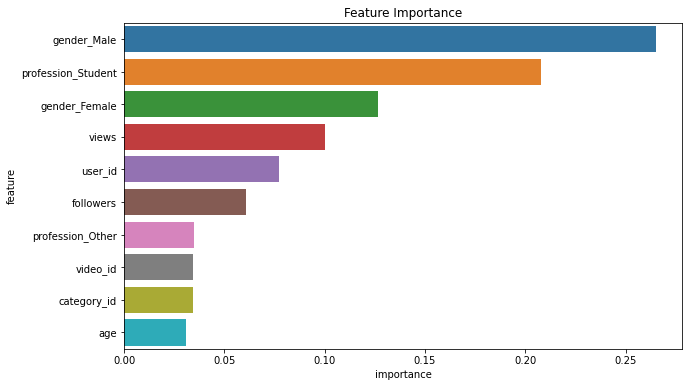

In [115]:
#visualzing the feature importance
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Basic Exploratory data analysis for better understanding the dataset

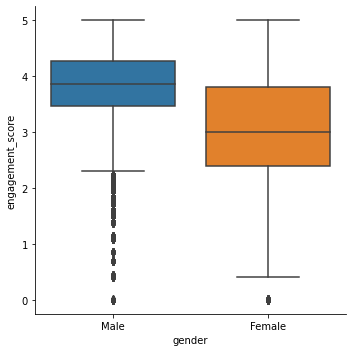

In [229]:
sns.catplot(x="gender", y="engagement_score", data=train,kind='box')

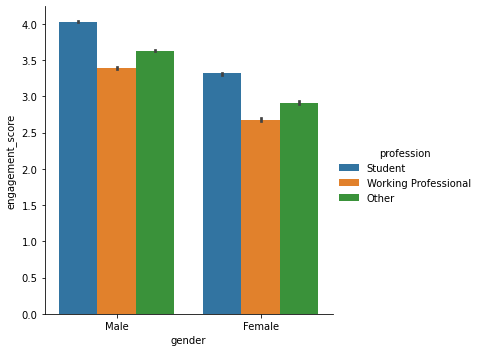

In [230]:
sns.catplot(x="gender", y="engagement_score", hue="profession", kind="bar", data=train)

In [980]:
sample

,row_id,engagement_score
0,89198,5.0
1,89199,5.0
2,89200,5.0
3,89201,5.0
4,89202,5.0
...,...,...
11116,100314,5.0
11117,100315,5.0
11118,100316,5.0
11119,100317,5.0


## Training the model using the whole dataset

In [167]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1500, 
                     learning_rate=0.2, max_depth=15, subsample=0.9, 
                     colsample_bytree=0.7)

In [168]:
#using all the data from training
inputs_df = inputs_df[numeric_cols + encoded_cols]

In [169]:
model.fit(inputs_df,targets)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Getting predictions on the test dataset

In [171]:
test = pd.read_csv('test_1zqHu22.csv')
# test = test[['age','gender','profession','followers','views']]

In [172]:
#dropping the row_id columns for predictions
test = test.drop('row_id',axis=1)

In [173]:
#encoding and normalizing the test column value on par with the train columns
test[encoded_cols] = encoder.transform(test[categorical_cols])
test[['age','followers','views']] = scaler2.transform(test[['age','followers','views']])

In [174]:
test

,user_id,category_id,video_id,age,gender,profession,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,7986,12,42,-1.211393,Male,Student,-1.572002,-1.358987,0.0,1.0,0.0,1.0,0.0
1,11278,34,115,-1.211393,Male,Student,-0.487267,1.254877,0.0,1.0,0.0,1.0,0.0
2,17245,8,110,2.138509,Female,Working Professional,0.597468,0.465505,1.0,0.0,0.0,0.0,1.0
3,9851,16,137,-0.764740,Male,Student,0.380521,-0.152588,0.0,1.0,0.0,1.0,0.0
4,16008,34,96,2.473499,Female,Other,-0.487267,1.254877,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,-0.429750,Male,Student,-0.270320,-0.692489,0.0,1.0,0.0,1.0,0.0
11117,6772,8,100,-0.653076,Female,Student,0.597468,0.465505,1.0,0.0,0.0,1.0,0.0
11118,2042,16,98,-0.318086,Male,Student,0.380521,-0.152588,0.0,1.0,0.0,1.0,0.0
11119,24626,8,16,0.910211,Male,Other,0.597468,0.465505,0.0,1.0,1.0,0.0,0.0


In [175]:
#concatinatng numeric and encoded cols
test = test[numeric_cols + encoded_cols]

In [176]:
test

,user_id,category_id,video_id,age,followers,views,gender_Female,gender_Male,profession_Other,profession_Student,profession_Working Professional
0,7986,12,42,-1.211393,-1.572002,-1.358987,0.0,1.0,0.0,1.0,0.0
1,11278,34,115,-1.211393,-0.487267,1.254877,0.0,1.0,0.0,1.0,0.0
2,17245,8,110,2.138509,0.597468,0.465505,1.0,0.0,0.0,0.0,1.0
3,9851,16,137,-0.764740,0.380521,-0.152588,0.0,1.0,0.0,1.0,0.0
4,16008,34,96,2.473499,-0.487267,1.254877,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,-0.429750,-0.270320,-0.692489,0.0,1.0,0.0,1.0,0.0
11117,6772,8,100,-0.653076,0.597468,0.465505,1.0,0.0,0.0,1.0,0.0
11118,2042,16,98,-0.318086,0.380521,-0.152588,0.0,1.0,0.0,1.0,0.0
11119,24626,8,16,0.910211,0.597468,0.465505,0.0,1.0,1.0,0.0,0.0


In [177]:
#test data preddictions
test_pred = model.predict(test)

In [178]:
pd.Series(test_pred)

0        4.064027
1        3.458420
2        3.280552
3        3.405906
4        2.226127
           ...   
11116    3.869742
11117    3.344770
11118    3.015593
11119    3.925570
11120    2.188846
Length: 11121, dtype: float32

In [179]:
#reading the test dataset again to match row_id column
test = pd.read_csv('test_1zqHu22.csv')

In [180]:
#creating submission csv
a_series = pd. Series(test['row_id'], name="row_id")
another_series = pd. Series(pd.Series(test_pred), name="engagement_score")
df = pd. concat([a_series, another_series], axis=1) 

In [181]:
df

,row_id,engagement_score
0,89198,4.064027
1,89199,3.458420
2,89200,3.280552
3,89201,3.405906
4,89202,2.226127
...,...,...
11116,100314,3.869742
11117,100315,3.344770
11118,100316,3.015593
11119,100317,3.925570


In [182]:
sample

,row_id,engagement_score
0,89198,5.0
1,89199,5.0
2,89200,5.0
3,89201,5.0
4,89202,5.0
...,...,...
11116,100314,5.0
11117,100315,5.0
11118,100316,5.0
11119,100317,5.0


In [183]:
#saving the model prediction on the test data
df.to_csv('rough_submission.csv',index=False)

In [184]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
pd.read_csv('rough_submission.csv')

,row_id,engagement_score
0,89198,4.254420
1,89199,3.716461
2,89200,3.630556
3,89201,3.317790
4,89202,2.620442
...,...,...
11116,100314,3.509440
11117,100315,3.061501
11118,100316,3.027391
11119,100317,3.430459
